# Project Phase 3: Video Moment Detection

## Connection to Opensearch index

In [1]:
import pprint as pp
import requests

host = 'localhost'
port = 9200

user = 'admin' # Add your user name here.
password = 'a.Zerty12.3' # Add your user password here. For testing only. Don't store credentials in code. 
index_name = user

In [2]:
import pprint as pp
from opensearchpy import OpenSearch
from opensearchpy import helpers

# Create the client with SSL/TLS enabled, but hostname verification disabled.
client = OpenSearch(
    hosts = [{'host': host, 'port': port}],
    http_auth = (user, password),
    use_ssl = True,
    verify_certs = False,
)

if client.indices.exists(index_name):
    resp = client.indices.open(index = index_name)
    print(resp)

    print('\n----------------------------------------------------------------------------------- INDEX SETTINGS')
    settings = client.indices.get_settings(index = index_name)
    pp.pprint(settings)

    print('\n----------------------------------------------------------------------------------- INDEX MAPPINGS')
    mappings = client.indices.get_mapping(index = index_name)
    pp.pprint(mappings)

    print('\n----------------------------------------------------------------------------------- INDEX #DOCs')
    print(client.count(index = index_name))
else:
    print("Index does not exist.")

{'acknowledged': True, 'shards_acknowledged': True}

----------------------------------------------------------------------------------- INDEX SETTINGS
{'admin': {'settings': {'index': {'creation_date': '1748875158899',
                                  'knn': 'true',
                                  'number_of_replicas': '0',
                                  'number_of_shards': '4',
                                  'provided_name': 'admin',
                                  'refresh_interval': '-1',
                                  'replication': {'type': 'DOCUMENT'},
                                  'uuid': 'XCmBz1Z9T1uQ55CN3oYQdg',
                                  'version': {'created': '136347827'}}}}}

----------------------------------------------------------------------------------- INDEX MAPPINGS
{'admin': {'mappings': {'properties': {'caption_bow': {'analyzer': 'standard',
                                                       'type': 'text'},
                           

/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/opensearchpy/connection/http_urllib3.py:214: UserWarning: Connecting to https://localhost:9200 using SSL with verify_certs=False is insecure.
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made 

In [3]:
# Creation (or not) of an empty and clean index

if client.indices.exists(index=index_name):
    client.indices.delete(index=index_name)        

client.indices.create(                             
    index=index_name,
    body={
            "settings": {
                "knn": True,                
                "number_of_shards": 4,
                "number_of_replicas": 0,
                "refresh_interval": "-1"    
            },
            "mappings": {
                "properties": {
                    "video_id": {
                        "type": "keyword"
                    },
                    "frame_path": {
                        "type": "text",
                        "fields": {
                            "keyword": {
                                "type": "keyword",
                                "ignore_above": 256
                            }
                        }
                    },
                    "moment_description": {
                        "type": "text",
                        "analyzer": "standard"
                    },
                    "caption_bow": {
                        "type": "text",
                        "analyzer": "standard"
                    },
                    "caption_vec": {
                        "type": "knn_vector",
                        "dimension": 384,
                        "index": True,
                        "similarity": "cosine"
                    },
                    "end_timestamp": {
                        "type": "float"
                    },
                    "frame_vec": {
                        "type": "knn_vector",
                        "dimension": 512,
                        "index": True,
                        "similarity": "cosine"
                    },
                    "visual_description_vec": {
                        "type": "knn_vector",
                        "dimension": 512,
                        "index": True,
                        "similarity": "cosine"
                    }
                }
            }
        }
)

client.indices.refresh(index=index_name)
print(f"Index « {index_name} » created")


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Index « admin » created


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
# Give every documents added to the index
client.indices.refresh(index=index_name)
query = {
    "query": {
        "match_all": {}
    },
    "size": 100  # Adjust the number to see more results if needed
}

response = client.search(
    index=index_name,
    body=query
)

# Print the total number of documents and some of the documents
print(f"Total hits: {response['hits']['total']['value']}")
for hit in response['hits']['hits']:
    print(hit['_source'])  # Print the source of each document

Total hits: 0


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


## Video downloading

In [ ]:
import os
import subprocess

# Directory where videos will be saved
download_path = "./data/videos/videos_part3"
os.makedirs(download_path, exist_ok=True)  # Create folder if it doesn't exist

# Replace with the actual video URL
# video_url = "https://youtu.be/daxodF_Pnzg?si=GM0lJFcjXopRpQ2c" 
video_url = "https://www.youtube.com/watch?v=zOGXJzSI92U"

video_id = video_url.split("=")[1]  # Extracted video ID from the URL
print(f"Video ID: {video_id}")

# Loop through each video in the top 10
output_template = os.path.join(download_path, f"{video_id}.mp4")

try:
    print(f"Downloading: {video_url}")
    subprocess.run(["yt-dlp", "-o", output_template, video_url], check=True)
    print(f"Downloaded: {output_template}")
except subprocess.CalledProcessError:
    print(f"Failed to download {video_id}.")

Video ID: zOGXJzSI92U
Downloading: https://www.youtube.com/watch?v=zOGXJzSI92U
[youtube] Extracting URL: https://www.youtube.com/watch?v=zOGXJzSI92U
[youtube] zOGXJzSI92U: Downloading webpage
[youtube] zOGXJzSI92U: Downloading tv client config
[youtube] zOGXJzSI92U: Downloading tv player API JSON
[youtube] zOGXJzSI92U: Downloading ios player API JSON
[youtube] zOGXJzSI92U: Downloading m3u8 information
[info] zOGXJzSI92U: Downloading 1 format(s): 18


[download] Destination: ./videos_part3/zOGXJzSI92U.mp4
[download] 100% of    8.27MiB in 00:00:00 at 18.11MiB/s    
Downloaded: ./videos_part3/zOGXJzSI92U.mp4


## Frames extraction

In [ ]:
import av
import os

INPUT_DIR  = "./data/videos/videos_part3"
OUTPUT_DIR = "./data/frames/frames_part3"

video_file   = f"{video_id}.mp4"                       
input_path   = os.path.join(INPUT_DIR,  video_file)    
frames_dir   = os.path.join(OUTPUT_DIR, video_id)   

os.makedirs(frames_dir, exist_ok=True)

with av.open(input_path) as container:
    stream   = container.streams.video[0]
    fps      = stream.average_rate
    interval = max(1, int(round(fps * 0.5)))          
    for i, frame in enumerate(container.decode(stream)):
        if i % interval == 0:
            timestamp = i / fps                        
            out_name  = f"{timestamp:.2f}.jpg"         
            frame.to_image().save(os.path.join(frames_dir, out_name), quality=80)

## Opensearch index update

In [7]:
# Give every documents added to the index: just to check how the index looks like
client.indices.refresh(index=index_name)
query = {
    "query": {
        "term": {
            "video_id": { 
                "value": video_id
            }
        }
    },
    "size": 100  # Adjust the number to see more results if needed
}

response = client.search(
    index=index_name,
    body=query
)

# Print the total number of documents and some of the documents
print(f"Total hits: {response['hits']['total']['value']}")
for hit in response['hits']['hits']:
    print(hit['_source'])  # Print the source of each document

Total hits: 0


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [8]:
import os

for frame in os.listdir(frames_dir):
    if not frame.lower().endswith((".jpg", ".jpeg", ".png")):
        continue                                           

    frame_path = os.path.join(frames_dir, frame)
    frame_name = os.path.splitext(frame)[0]               
    doc_id     = f"{video_id}_{frame_name}"               

    document = {
        "video_id": video_id,
        "moment_description": None,
        "frame_path": frame_path,
        "caption_bow": None,
        "caption_vec": None,
        "visual_description_vec": None,
        "frame_vec": None,
        "end_timestamp": None,
        "start_timestamp": None,
        "video_length": None,
    }

    client.index(index=index_name, id=doc_id, body=document)


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/sit

In [9]:
# Refresh the index to make sure all documents are searchable
client.indices.refresh(index=index_name)

# Retrieving and displaying the documents from the index to check if they were added correctly
query = {
    "query": {
        "match": {
            "video_id": video_id
        }
    },
    "size": 100
}

response = client.search(
    index=index_name,
    body=query
)

# Print results
print(f"Total hits: {response['hits']['total']['value']}")
for hit in response['hits']['hits']:
    print(hit['_source'])

Total hits: 188
{'video_id': 'zOGXJzSI92U', 'moment_description': None, 'frame_path': './frames_part3/zOGXJzSI92U/5.51.jpg', 'caption_bow': None, 'caption_vec': None, 'visual_description_vec': None, 'frame_vec': None, 'end_timestamp': None, 'start_timestamp': None, 'video_length': None}
{'video_id': 'zOGXJzSI92U', 'moment_description': None, 'frame_path': './frames_part3/zOGXJzSI92U/20.02.jpg', 'caption_bow': None, 'caption_vec': None, 'visual_description_vec': None, 'frame_vec': None, 'end_timestamp': None, 'start_timestamp': None, 'video_length': None}
{'video_id': 'zOGXJzSI92U', 'moment_description': None, 'frame_path': './frames_part3/zOGXJzSI92U/51.05.jpg', 'caption_bow': None, 'caption_vec': None, 'visual_description_vec': None, 'frame_vec': None, 'end_timestamp': None, 'start_timestamp': None, 'video_length': None}
{'video_id': 'zOGXJzSI92U', 'moment_description': None, 'frame_path': './frames_part3/zOGXJzSI92U/7.01.jpg', 'caption_bow': None, 'caption_vec': None, 'visual_descrip

/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


## Captions generations

In [10]:
from ollama import Client

client_llava = Client(
  host='https://twiz.novasearch.org/ollama',
  headers={'x-some-header': 'some-value'}
)

client_os = client

model_multimodal = 'llava-phi3:latest'

In [11]:
from transformers import CLIPModel, CLIPProcessor

# Load the clip Model and Processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [12]:
import torch

def encode_text(caption):

    inputs = processor(text=caption, return_tensors="pt", padding=True, truncation=True, max_length=77)

    # Encode the caption to get the embedding
    with torch.no_grad():
        embedding = model.get_text_features(**inputs)
    
    # Normalize the caption embedding
    embedding = embedding / embedding.norm(dim=-1, keepdim=True)

    return embedding.numpy()[0]

In [13]:
# Function to generate descriptions for frames without moment_description
def generate_missing_descriptions():
    """
    1. Retrieve all frames without descriptions
    2. Use LLaVA to generate descriptions
    3. Update OpenSearch with the descriptions and their embeddings
    """

    # Retrieve all documents without descriptions
    client_os.indices.refresh(index=index_name)
    query = {
        "query": {
            "bool": {
                "must_not": {
                    "exists": {
                        "field": "moment_description"
                    }
                }
            }
        },
        "size": 3000
    }

    response = client_os.search(
        index=index_name,
        body=query
    )

    total_documents = len(response['hits']['hits'])
    print(f"Found {total_documents} frames without descriptions")

    # Process each frame to generate a description
    for i, doc in enumerate(response['hits']['hits']):
        doc_id = doc['_id']
        frame_path = doc['_source']['frame_path']

        print(f"Processing frame {i + 1}/{total_documents}: {frame_path}")

        # Use LLaVA to generate a description
        llava_response = client_llava.chat(
            model=model_multimodal,
            messages=[
                {
                    'role': 'user',
                    'content': 'Describe this image frame from a video in one concise sentence.',
                    'images': [frame_path]
                },
            ]
        )

        # Extract the generated description
        generated_description = llava_response.message.content.strip()

        # Generate CLIP embedding for the description
        description_embedding = encode_text(generated_description)

        # Update the document in OpenSearch
        update_body = {
            "doc": {
                "moment_description": generated_description,
                "visual_description_vec": description_embedding.tolist()
            }
        }

        update_response = client_os.update(
            index=index_name,
            id=doc_id,
            body=update_body
        )

        if i % 10 == 0:  # Log progress every 10 frames
            print(f"Progress: {i + 1}/{total_documents}")

    print("Description generation complete!")
    return total_documents

In [14]:
# Execute the function to generate missing descriptions
num_updated = generate_missing_descriptions()
print(f"Generated descriptions for {num_updated} frames")

/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Found 188 frames without descriptions
Processing frame 1/188: ./frames_part3/zOGXJzSI92U/4.00.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 1/188
Processing frame 2/188: ./frames_part3/zOGXJzSI92U/47.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 3/188: ./frames_part3/zOGXJzSI92U/64.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 4/188: ./frames_part3/zOGXJzSI92U/17.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 5/188: ./frames_part3/zOGXJzSI92U/41.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 6/188: ./frames_part3/zOGXJzSI92U/38.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 7/188: ./frames_part3/zOGXJzSI92U/14.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 8/188: ./frames_part3/zOGXJzSI92U/30.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 9/188: ./frames_part3/zOGXJzSI92U/91.09.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 10/188: ./frames_part3/zOGXJzSI92U/16.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 11/188: ./frames_part3/zOGXJzSI92U/83.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 11/188
Processing frame 12/188: ./frames_part3/zOGXJzSI92U/23.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 13/188: ./frames_part3/zOGXJzSI92U/43.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 14/188: ./frames_part3/zOGXJzSI92U/6.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 15/188: ./frames_part3/zOGXJzSI92U/90.09.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 16/188: ./frames_part3/zOGXJzSI92U/19.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 17/188: ./frames_part3/zOGXJzSI92U/15.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 18/188: ./frames_part3/zOGXJzSI92U/59.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 19/188: ./frames_part3/zOGXJzSI92U/31.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 20/188: ./frames_part3/zOGXJzSI92U/60.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 21/188: ./frames_part3/zOGXJzSI92U/71.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 21/188
Processing frame 22/188: ./frames_part3/zOGXJzSI92U/34.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 23/188: ./frames_part3/zOGXJzSI92U/13.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 24/188: ./frames_part3/zOGXJzSI92U/36.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 25/188: ./frames_part3/zOGXJzSI92U/55.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 26/188: ./frames_part3/zOGXJzSI92U/25.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 27/188: ./frames_part3/zOGXJzSI92U/33.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 28/188: ./frames_part3/zOGXJzSI92U/65.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 29/188: ./frames_part3/zOGXJzSI92U/93.09.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 30/188: ./frames_part3/zOGXJzSI92U/27.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 31/188: ./frames_part3/zOGXJzSI92U/30.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 31/188
Processing frame 32/188: ./frames_part3/zOGXJzSI92U/87.09.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 33/188: ./frames_part3/zOGXJzSI92U/78.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 34/188: ./frames_part3/zOGXJzSI92U/57.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 35/188: ./frames_part3/zOGXJzSI92U/79.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 36/188: ./frames_part3/zOGXJzSI92U/68.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 37/188: ./frames_part3/zOGXJzSI92U/16.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 38/188: ./frames_part3/zOGXJzSI92U/22.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 39/188: ./frames_part3/zOGXJzSI92U/19.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 40/188: ./frames_part3/zOGXJzSI92U/10.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 41/188: ./frames_part3/zOGXJzSI92U/54.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 41/188
Processing frame 42/188: ./frames_part3/zOGXJzSI92U/58.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 43/188: ./frames_part3/zOGXJzSI92U/89.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 44/188: ./frames_part3/zOGXJzSI92U/42.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 45/188: ./frames_part3/zOGXJzSI92U/27.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 46/188: ./frames_part3/zOGXJzSI92U/3.50.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 47/188: ./frames_part3/zOGXJzSI92U/66.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 48/188: ./frames_part3/zOGXJzSI92U/39.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 49/188: ./frames_part3/zOGXJzSI92U/88.09.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 50/188: ./frames_part3/zOGXJzSI92U/68.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 51/188: ./frames_part3/zOGXJzSI92U/81.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 51/188
Processing frame 52/188: ./frames_part3/zOGXJzSI92U/86.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 53/188: ./frames_part3/zOGXJzSI92U/50.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 54/188: ./frames_part3/zOGXJzSI92U/85.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 55/188: ./frames_part3/zOGXJzSI92U/62.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 56/188: ./frames_part3/zOGXJzSI92U/26.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 57/188: ./frames_part3/zOGXJzSI92U/62.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 58/188: ./frames_part3/zOGXJzSI92U/93.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 59/188: ./frames_part3/zOGXJzSI92U/58.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 60/188: ./frames_part3/zOGXJzSI92U/35.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 61/188: ./frames_part3/zOGXJzSI92U/74.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 61/188
Processing frame 62/188: ./frames_part3/zOGXJzSI92U/1.50.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 63/188: ./frames_part3/zOGXJzSI92U/5.00.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 64/188: ./frames_part3/zOGXJzSI92U/70.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 65/188: ./frames_part3/zOGXJzSI92U/2.00.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 66/188: ./frames_part3/zOGXJzSI92U/34.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 67/188: ./frames_part3/zOGXJzSI92U/24.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 68/188: ./frames_part3/zOGXJzSI92U/60.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 69/188: ./frames_part3/zOGXJzSI92U/14.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 70/188: ./frames_part3/zOGXJzSI92U/55.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 71/188: ./frames_part3/zOGXJzSI92U/0.50.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 71/188
Processing frame 72/188: ./frames_part3/zOGXJzSI92U/53.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 73/188: ./frames_part3/zOGXJzSI92U/28.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 74/188: ./frames_part3/zOGXJzSI92U/82.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 75/188: ./frames_part3/zOGXJzSI92U/67.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 76/188: ./frames_part3/zOGXJzSI92U/76.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 77/188: ./frames_part3/zOGXJzSI92U/59.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 78/188: ./frames_part3/zOGXJzSI92U/69.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 79/188: ./frames_part3/zOGXJzSI92U/64.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 80/188: ./frames_part3/zOGXJzSI92U/88.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 81/188: ./frames_part3/zOGXJzSI92U/72.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 81/188
Processing frame 82/188: ./frames_part3/zOGXJzSI92U/49.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 83/188: ./frames_part3/zOGXJzSI92U/75.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 84/188: ./frames_part3/zOGXJzSI92U/48.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 85/188: ./frames_part3/zOGXJzSI92U/54.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 86/188: ./frames_part3/zOGXJzSI92U/46.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 87/188: ./frames_part3/zOGXJzSI92U/11.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 88/188: ./frames_part3/zOGXJzSI92U/2.50.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 89/188: ./frames_part3/zOGXJzSI92U/42.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 90/188: ./frames_part3/zOGXJzSI92U/80.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 91/188: ./frames_part3/zOGXJzSI92U/38.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 91/188
Processing frame 92/188: ./frames_part3/zOGXJzSI92U/92.09.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 93/188: ./frames_part3/zOGXJzSI92U/73.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 94/188: ./frames_part3/zOGXJzSI92U/20.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 95/188: ./frames_part3/zOGXJzSI92U/18.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 96/188: ./frames_part3/zOGXJzSI92U/33.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 97/188: ./frames_part3/zOGXJzSI92U/75.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 98/188: ./frames_part3/zOGXJzSI92U/13.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 99/188: ./frames_part3/zOGXJzSI92U/89.09.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 100/188: ./frames_part3/zOGXJzSI92U/70.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 101/188: ./frames_part3/zOGXJzSI92U/9.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 101/188
Processing frame 102/188: ./frames_part3/zOGXJzSI92U/41.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 103/188: ./frames_part3/zOGXJzSI92U/11.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 104/188: ./frames_part3/zOGXJzSI92U/52.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 105/188: ./frames_part3/zOGXJzSI92U/84.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 106/188: ./frames_part3/zOGXJzSI92U/4.50.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 107/188: ./frames_part3/zOGXJzSI92U/87.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 108/188: ./frames_part3/zOGXJzSI92U/5.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 109/188: ./frames_part3/zOGXJzSI92U/20.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 110/188: ./frames_part3/zOGXJzSI92U/51.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 111/188: ./frames_part3/zOGXJzSI92U/7.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 111/188
Processing frame 112/188: ./frames_part3/zOGXJzSI92U/53.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 113/188: ./frames_part3/zOGXJzSI92U/56.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 114/188: ./frames_part3/zOGXJzSI92U/61.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 115/188: ./frames_part3/zOGXJzSI92U/43.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 116/188: ./frames_part3/zOGXJzSI92U/10.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 117/188: ./frames_part3/zOGXJzSI92U/18.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 118/188: ./frames_part3/zOGXJzSI92U/0.00.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 119/188: ./frames_part3/zOGXJzSI92U/80.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 120/188: ./frames_part3/zOGXJzSI92U/63.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 121/188: ./frames_part3/zOGXJzSI92U/8.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 121/188
Processing frame 122/188: ./frames_part3/zOGXJzSI92U/29.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 123/188: ./frames_part3/zOGXJzSI92U/85.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 124/188: ./frames_part3/zOGXJzSI92U/37.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 125/188: ./frames_part3/zOGXJzSI92U/3.00.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 126/188: ./frames_part3/zOGXJzSI92U/77.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 127/188: ./frames_part3/zOGXJzSI92U/81.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 128/188: ./frames_part3/zOGXJzSI92U/47.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 129/188: ./frames_part3/zOGXJzSI92U/73.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 130/188: ./frames_part3/zOGXJzSI92U/72.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 131/188: ./frames_part3/zOGXJzSI92U/69.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 131/188
Processing frame 132/188: ./frames_part3/zOGXJzSI92U/44.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 133/188: ./frames_part3/zOGXJzSI92U/50.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 134/188: ./frames_part3/zOGXJzSI92U/44.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 135/188: ./frames_part3/zOGXJzSI92U/40.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 136/188: ./frames_part3/zOGXJzSI92U/66.57.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 137/188: ./frames_part3/zOGXJzSI92U/29.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 138/188: ./frames_part3/zOGXJzSI92U/67.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 139/188: ./frames_part3/zOGXJzSI92U/39.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 140/188: ./frames_part3/zOGXJzSI92U/6.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 141/188: ./frames_part3/zOGXJzSI92U/21.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 141/188
Processing frame 142/188: ./frames_part3/zOGXJzSI92U/32.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 143/188: ./frames_part3/zOGXJzSI92U/78.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 144/188: ./frames_part3/zOGXJzSI92U/1.00.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 145/188: ./frames_part3/zOGXJzSI92U/25.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 146/188: ./frames_part3/zOGXJzSI92U/15.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 147/188: ./frames_part3/zOGXJzSI92U/86.09.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 148/188: ./frames_part3/zOGXJzSI92U/84.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 149/188: ./frames_part3/zOGXJzSI92U/83.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 150/188: ./frames_part3/zOGXJzSI92U/76.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 151/188: ./frames_part3/zOGXJzSI92U/71.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 151/188
Processing frame 152/188: ./frames_part3/zOGXJzSI92U/57.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 153/188: ./frames_part3/zOGXJzSI92U/23.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 154/188: ./frames_part3/zOGXJzSI92U/8.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 155/188: ./frames_part3/zOGXJzSI92U/9.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 156/188: ./frames_part3/zOGXJzSI92U/82.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 157/188: ./frames_part3/zOGXJzSI92U/12.01.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 158/188: ./frames_part3/zOGXJzSI92U/45.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 159/188: ./frames_part3/zOGXJzSI92U/40.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 160/188: ./frames_part3/zOGXJzSI92U/17.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 161/188: ./frames_part3/zOGXJzSI92U/35.54.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 161/188
Processing frame 162/188: ./frames_part3/zOGXJzSI92U/92.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 163/188: ./frames_part3/zOGXJzSI92U/90.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 164/188: ./frames_part3/zOGXJzSI92U/32.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 165/188: ./frames_part3/zOGXJzSI92U/56.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 166/188: ./frames_part3/zOGXJzSI92U/65.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 167/188: ./frames_part3/zOGXJzSI92U/37.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 168/188: ./frames_part3/zOGXJzSI92U/52.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 169/188: ./frames_part3/zOGXJzSI92U/12.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 170/188: ./frames_part3/zOGXJzSI92U/61.56.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 171/188: ./frames_part3/zOGXJzSI92U/63.06.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 171/188
Processing frame 172/188: ./frames_part3/zOGXJzSI92U/74.07.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 173/188: ./frames_part3/zOGXJzSI92U/26.53.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 174/188: ./frames_part3/zOGXJzSI92U/45.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 175/188: ./frames_part3/zOGXJzSI92U/49.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 176/188: ./frames_part3/zOGXJzSI92U/21.02.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 177/188: ./frames_part3/zOGXJzSI92U/36.04.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 178/188: ./frames_part3/zOGXJzSI92U/48.05.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 179/188: ./frames_part3/zOGXJzSI92U/91.59.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 180/188: ./frames_part3/zOGXJzSI92U/31.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 181/188: ./frames_part3/zOGXJzSI92U/7.51.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Progress: 181/188
Processing frame 182/188: ./frames_part3/zOGXJzSI92U/28.03.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 183/188: ./frames_part3/zOGXJzSI92U/22.52.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 184/188: ./frames_part3/zOGXJzSI92U/46.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 185/188: ./frames_part3/zOGXJzSI92U/79.58.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 186/188: ./frames_part3/zOGXJzSI92U/51.55.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 187/188: ./frames_part3/zOGXJzSI92U/77.08.jpg


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Processing frame 188/188: ./frames_part3/zOGXJzSI92U/24.02.jpg
Description generation complete!
Generated descriptions for 188 frames


/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


## Captions encoding

### Frame embedding and index update (if needed)

In [15]:
import torch
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Load the clip Model and Processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# Encoding function
def encode_image(image_path):
    image = Image.open(image_path).convert("RGB") # Ensure the image is in RGB format

    # Prepare the image for the model
    inputs = processor(images=image, return_tensors="pt", truncation=True, max_length=77)

    # Encode the image to get the embedding
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)
    
    # Normalize the image embedding
    image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True)

    return image_features.numpy()[0]


# Iterate on the documents
query = {
    "query": {
            "bool": {
                "must_not": {
                    "exists": {
                        "field": "moment_description"
                    }
                }
            }
        },
}

# Retrieve all documents from the index
response = client.search(index=index_name, body=query, size=3000)
documents = response["hits"]["hits"]
# Add the embedding to each document
for doc in documents:
    doc_id = doc["_id"]  # ID document

    image_path = doc["_source"]["frame_path"]  # Get the image path from the document
    #print(image_path)
    embedding = encode_image(image_path)  # Get the embedding for the image

    # Update the document with the new field
    update_body = {
        "doc": {
            "frame_vec": embedding
        }
    }
    update_response = client.update(index=index_name, id=doc_id, body=update_body)

/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/sit

In [16]:
# Check the embeddings were added correctly
# Refresh the index to make sure all documents are searchable
client.indices.refresh(index=index_name)

# Retrieving and displaying the documents from the index to check if they were added correctly
query = {
    "query": {
        "match": {
            "video_id": video_id
        }
    },
    "size": 100
}

response = client.search(
    index=index_name,
    body=query
)

# Print results
print(f"Total hits: {response['hits']['total']['value']}")
for hit in response['hits']['hits']:
    print(hit['_source'])

Total hits: 188
{'video_id': 'zOGXJzSI92U', 'moment_description': 'A man bending over picking up a small object on the ground next to a woman wearing white clothes with another lady watching him.', 'frame_path': './frames_part3/zOGXJzSI92U/5.51.jpg', 'caption_bow': None, 'caption_vec': None, 'visual_description_vec': [-0.00697762006893754, -0.0070565990172326565, -0.0349498987197876, -0.011509657837450504, 0.023113451898097992, 0.007851935923099518, 0.02047864720225334, -0.03768826648592949, -0.027409425005316734, 0.026540938764810562, 0.004017511382699013, -0.006908138282597065, 0.06380321085453033, -0.0017024473054334521, 0.012522071599960327, -0.022835422307252884, -0.05824887380003929, -0.006764908786863089, -0.09014143794775009, -0.0014143061125651002, -0.03139815852046013, 0.0795285776257515, -0.010761347599327564, -0.03768619894981384, -0.01372485887259245, 0.02189658023416996, -0.0609605498611927, 0.03515284135937691, -0.039574071764945984, -0.013643697835505009, -0.03107029758

/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


### Caption embedding

In [17]:
import torch
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Load the clip Model and Processor
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

# Encoding function
def encode_text(caption):

    inputs = processor(text=caption, return_tensors="pt", padding=True, truncation=True, max_length=77)

    # Encode the caption to get the embedding
    with torch.no_grad():
        embedding = model.get_text_features(**inputs)
    
    # Normalize the caption embedding
    embedding = embedding / embedding.norm(dim=-1, keepdim=True)

    return embedding.numpy()[0]


# Iterate on the documents
query = {
    "query": {
            "bool": {
                "must_not": {
                    "exists": {
                        "field": "visual_description_vec"
                    }
                }
            }
        },
}
# Retrieve all documents from the index
response = client.search(index=index_name, body=query, size=2000)
documents = response["hits"]["hits"]
# Add the embedding of the description to each document that have one
for doc in documents:
    doc_id = doc["_id"]  # ID document

    caption = doc["_source"]["moment_description"]  # Get the caption from the document
    
    if not caption == None:
        embedding = encode_text(caption)  # Get the embedding for the caption

        # Update the document with the new field
        update_body = {
            "doc": {
                "visual_description_vec": embedding
            }
        }
        update_response = client.update(index=index_name, id=doc_id, body=update_body)

/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [18]:
# Check the embeddings were added correctly
# Refresh the index to make sure all documents are searchable
client.indices.refresh(index=index_name)

# Retrieving and displaying the documents from the index to check if they were added correctly
query = {
    "query": {
        "match": {
            "video_id": video_id
        }
    },
    "size": 100
}

response = client.search(
    index=index_name,
    body=query
)

embedded_frames = []
# Print results
print(f"Total hits: {response['hits']['total']['value']}")
for hit in response['hits']['hits']:
    print(hit['_source'])
    source = hit['_source']
    frame_path = source.get('frame_path')
    filename = os.path.basename(frame_path)
    second = float(os.path.splitext(filename)[0])
    description = source.get('moment_description')
    embedding = source.get('visual_description_vec')
    embedded_frames.append((frame_path,second,description,embedding))
    embedded_frames.sort(key=lambda x: x[1]) # Sort based on the second


Total hits: 188
{'video_id': 'zOGXJzSI92U', 'moment_description': 'A man bending over picking up a small object on the ground next to a woman wearing white clothes with another lady watching him.', 'frame_path': './frames_part3/zOGXJzSI92U/5.51.jpg', 'caption_bow': None, 'caption_vec': None, 'visual_description_vec': [-0.00697762006893754, -0.0070565990172326565, -0.0349498987197876, -0.011509657837450504, 0.023113451898097992, 0.007851935923099518, 0.02047864720225334, -0.03768826648592949, -0.027409425005316734, 0.026540938764810562, 0.004017511382699013, -0.006908138282597065, 0.06380321085453033, -0.0017024473054334521, 0.012522071599960327, -0.022835422307252884, -0.05824887380003929, -0.006764908786863089, -0.09014143794775009, -0.0014143061125651002, -0.03139815852046013, 0.0795285776257515, -0.010761347599327564, -0.03768619894981384, -0.01372485887259245, 0.02189658023416996, -0.0609605498611927, 0.03515284135937691, -0.039574071764945984, -0.013643697835505009, -0.03107029758

/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/hugo/NOVA/mpdw/env/lib/python3.12/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


## Regroupment based on clustering

In [19]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
embeddings = np.array([vec for _,_,_,vec in embedded_frames])
labels = dbscan.fit_predict(embeddings)

## Frames fusionning

In [20]:
clustered_frames = [
    {
        "frame_path": path,
        "second": second,
        "description": description,
        "embedding": embedding,
        "cluster": label
    }
    for (path, second, description, embedding), label in zip(embedded_frames, labels)
]


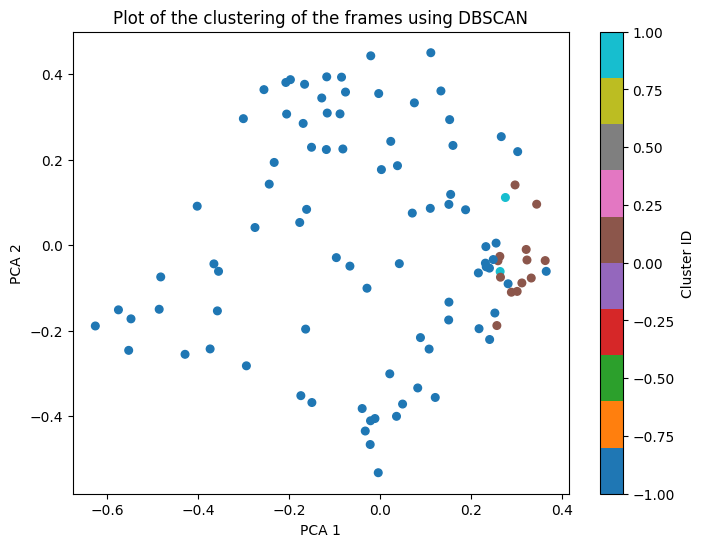

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set the vector into 2 dimensions in order to visualize it
pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title("Plot of the clustering of the frames using DBSCAN")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [22]:
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity

clusters = defaultdict(list)
for item in clustered_frames:
    clusters[item["cluster"]].append(item)

cluster_summaries = []
for cluster_id, items in sorted(clusters.items()):
    if cluster_id != -1:
        seconds = [item['second'] for item in items]
        start_time = min(seconds)
        end_time = max(seconds)
        embeddings = np.array([item['embedding'] for item in items])
        mean_embedding = np.mean(embeddings, axis=0).reshape(1,-1)
        cluster_descriptions = [item['description'] for item in items]
        similarities = cosine_similarity(mean_embedding, embeddings)[0]
        best_idx = np.argmax(similarities)
        summary_description = cluster_descriptions[best_idx]
        cluster_summaries.append({
            "cluster_id": cluster_id,
            "start_time": start_time,
            "end_time": end_time,
            "summary": summary_description
        })

for summary in cluster_summaries:
    print(f" Cluster {summary['cluster_id']} ({summary['start_time']}s - {summary['end_time']}s)")
    print(f"Description: {summary['summary']}\n")


 Cluster 0 (14.01s - 67.07s)
Description: a man riding skateboard on a sidewalk and having fun with it.

 Cluster 1 (18.02s - 50.55s)
Description: A man is performing a trick on his skateboard, jumping over two small wheels.

